In [1]:
# Setup - Run only once per Kernel App
%conda install https://anaconda.org/conda-forge/openjdk/11.0.1/download/linux-64/openjdk-11.0.1-hacce0ff_1021.tar.bz2

# install PySpark
%pip install pyspark==3.4.0

# restart kernel
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")




## Package Plan ##

  environment location: /opt/conda



Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install spark-nlp==5.5.0
!pip install spark-nlp --upgrade

  Using cached spark_nlp-5.5.0-py2.py3-none-any.whl.metadata (19 kB)
Using cached spark_nlp-5.5.0-py2.py3-none-any.whl (620 kB)
  Attempting uninstall: spark-nlp
    Found existing installation: spark-nlp 5.5.1
    Uninstalling spark-nlp-5.5.1:
      Successfully uninstalled spark-nlp-5.5.1
  Using cached spark_nlp-5.5.1-py2.py3-none-any.whl.metadata (19 kB)
Using cached spark_nlp-5.5.1-py2.py3-none-any.whl (626 kB)
  Attempting uninstall: spark-nlp
    Found existing installation: spark-nlp 5.5.0
    Uninstalling spark-nlp-5.5.0:
      Successfully uninstalled spark-nlp-5.5.0


In [4]:
import sparknlp
spark = sparknlp.start()

sparknlp.version()
spark.version

:: loading settings :: url = jar:file:/opt/conda/lib/python3.11/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/sagemaker-user/.ivy2/cache
The jars for the packages stored in: /home/sagemaker-user/.ivy2/jars
com.johnsnowlabs.nlp#spark-nlp_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-080e928f-fbfd-4d80-b442-13f0814e4a82;1.0
	confs: [default]
	found com.johnsnowlabs.nlp#spark-nlp_2.12;5.5.1 in central
	found com.typesafe#config;1.4.2 in central
	found org.rocksdb#rocksdbjni;6.29.5 in central
	found com.amazonaws#aws-java-sdk-s3;1.12.500 in central
	found com.amazonaws#aws-java-sdk-kms;1.12.500 in central
	found com.amazonaws#aws-java-sdk-core;1.12.500 in central
	found commons-logging#commons-logging;1.1.3 in central
	found commons-codec#commons-codec;1.15 in central
	found org.apache.httpcomponents#httpclient;4.5.13 in central
	found org.apache.httpcomponents#httpcore;4.4.13 in central
	found software.amazon.ion#ion-java;1.0.2 in central
	found joda-time#joda-time;2.8.1 in central
	found com.amazonaws#jmespath-java;1.

'3.4.0'

In [3]:
import json
import sparknlp
import numpy as np
import pandas as pd
from sparknlp.base import *
from sparknlp.annotator import *
from sparknlp.pretrained import PretrainedPipeline
from pyspark.sql import functions as f
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import Tokenizer, CountVectorizer, IDF
from pyspark.ml import Pipeline

In [6]:

print(f"sparknlp version: {sparknlp.version()}")

spark = SparkSession.builder \
    .appName("Spark NLP")\
    .master("local[*]")\
    .config("spark.driver.memory","16G")\
    .config("spark.driver.maxResultSize", "0") \
    .config("spark.kryoserializer.buffer.max", "2000M")\
    .config("spark.jars.packages", "com.johnsnowlabs.nlp:spark-nlp_2.12:5.1.3")\
    .getOrCreate()

#

sparknlp version: 5.5.1


24/12/05 19:45:52 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [3]:
tokenizer = Tokenizer(inputCol="text", outputCol="words")
# Vectorize the words using CountVectorizer (instead of HashingTF)
countVectorizer = CountVectorizer(inputCol="words", outputCol="raw_features", vocabSize=1000, minDF=1)
# Compute the IDF (Inverse Document Frequency)
idf = IDF(inputCol="raw_features", outputCol="tfidf_features")
# Build the pipeline
pipeline = Pipeline(stages=[tokenizer, countVectorizer, idf])

# Fit and transform the data
model = pipeline.fit(df)
result = model.transform(df)

openjdk version "11.0.1-internal" 2018-10-16
OpenJDK Runtime Environment (build 11.0.1-internal+0-adhoc..src)
OpenJDK 64-Bit Server VM (build 11.0.1-internal+0-adhoc..src, mixed mode)


In [4]:
# Import pyspark and build Spark session
spark = (
    SparkSession.builder.appName("PySparkApp")
    .config("spark.jars.packages", "org.apache.hadoop:hadoop-aws:3.2.2")
    .config(
        "fs.s3a.aws.credentials.provider",
        "com.amazonaws.auth.ContainerCredentialsProvider",
    )
    .getOrCreate()
)

print(spark.version)

:: loading settings :: url = jar:file:/opt/conda/lib/python3.11/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/sagemaker-user/.ivy2/cache
The jars for the packages stored in: /home/sagemaker-user/.ivy2/jars
org.apache.hadoop#hadoop-aws added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-fa249e36-9f90-4e6a-9ed9-057b2b6eb57a;1.0
	confs: [default]
	found org.apache.hadoop#hadoop-aws;3.2.2 in central
	found com.amazonaws#aws-java-sdk-bundle;1.11.563 in central
:: resolution report :: resolve 194ms :: artifacts dl 7ms
	:: modules in use:
	com.amazonaws#aws-java-sdk-bundle;1.11.563 from central in [default]
	org.apache.hadoop#hadoop-aws;3.2.2 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   2   |   0   |   0   |   0   ||   2   |   0   |
	----------------

3.4.0


In [5]:
%%time
comments = spark.read.parquet(
    "s3a://sagemaker-us-east-1-249863557958/project/comments",
    header=True
)
#comments.show()

24/12/05 19:47:05 WARN MetricsConfig: Cannot locate configuration: tried hadoop-metrics2-s3a-file-system.properties,hadoop-metrics2.properties
24/12/05 19:47:06 WARN FileSystem: Failed to initialize fileystem s3a://sagemaker-us-east-1-249863557958/project/comments: java.io.FileNotFoundException: Bucket sagemaker-us-east-1-249863557958 does not exist
24/12/05 19:47:06 WARN FileStreamSink: Assume no metadata directory. Error while looking for metadata directory in the path: s3a://sagemaker-us-east-1-249863557958/project/comments.
java.io.FileNotFoundException: Bucket sagemaker-us-east-1-249863557958 does not exist
	at org.apache.hadoop.fs.s3a.S3AFileSystem.verifyBucketExists(S3AFileSystem.java:393)
	at org.apache.hadoop.fs.s3a.S3AFileSystem.initialize(S3AFileSystem.java:322)
	at org.apache.hadoop.fs.FileSystem.createFileSystem(FileSystem.java:3469)
	at org.apache.hadoop.fs.FileSystem.access$300(FileSystem.java:174)
	at org.apache.hadoop.fs.FileSystem$Cache.getInternal(FileSystem.java:357

Py4JJavaError: An error occurred while calling o32.parquet.
: java.io.FileNotFoundException: Bucket sagemaker-us-east-1-249863557958 does not exist
	at org.apache.hadoop.fs.s3a.S3AFileSystem.verifyBucketExists(S3AFileSystem.java:393)
	at org.apache.hadoop.fs.s3a.S3AFileSystem.initialize(S3AFileSystem.java:322)
	at org.apache.hadoop.fs.FileSystem.createFileSystem(FileSystem.java:3469)
	at org.apache.hadoop.fs.FileSystem.access$300(FileSystem.java:174)
	at org.apache.hadoop.fs.FileSystem$Cache.getInternal(FileSystem.java:3574)
	at org.apache.hadoop.fs.FileSystem$Cache.get(FileSystem.java:3521)
	at org.apache.hadoop.fs.FileSystem.get(FileSystem.java:540)
	at org.apache.hadoop.fs.Path.getFileSystem(Path.java:365)
	at org.apache.spark.sql.execution.datasources.DataSource$.$anonfun$checkAndGlobPathIfNecessary$1(DataSource.scala:724)
	at scala.collection.immutable.List.map(List.scala:293)
	at org.apache.spark.sql.execution.datasources.DataSource$.checkAndGlobPathIfNecessary(DataSource.scala:722)
	at org.apache.spark.sql.execution.datasources.DataSource.checkAndGlobPathIfNecessary(DataSource.scala:551)
	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:404)
	at org.apache.spark.sql.DataFrameReader.loadV1Source(DataFrameReader.scala:229)
	at org.apache.spark.sql.DataFrameReader.$anonfun$load$2(DataFrameReader.scala:211)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:211)
	at org.apache.spark.sql.DataFrameReader.parquet(DataFrameReader.scala:563)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:834)


In [9]:
comments.groupBy('subreddit').count().show()

+--------------+-------+
|     subreddit|  count|
+--------------+-------+
|       finance|  25291|
|CryptoCurrency|3360896|
|     investing| 516497|
+--------------+-------+



In [5]:
# filter to 1 1000th of the data for exploratory analysis
working_comments = comments.sample(withReplacement = False, fraction = 0.001)

In [6]:
working_comments.write.parquet("./small_sample_comments.parquet")


NameError: name 'working_comments' is not defined

In [6]:
working_comments2 = spark.read.parquet(
    "./small_sample_comments.parquet",
    header=True
)
working_comments2.groupBy('subreddit').count().show()

+--------------+-----+
|     subreddit|count|
+--------------+-----+
|       finance|   32|
|CryptoCurrency| 3384|
|     investing|  465|
+--------------+-----+



In [7]:
working_comments2.select(f.col('body')).show()

+--------------------+
|                body|
+--------------------+
|We’ll all be rich...|
|It’s probably jus...|
|It's going to be ...|
|I will be laughin...|
|           [removed]|
|Always the countr...|
|I am excited to s...|
|           Over 9000|
|  That's incredible!|
|These are the Bit...|
|The real whale, r...|
|                 VTI|
|I mean that's one...|
|I love your enthu...|
|What a sack of sh...|
|Stablecoins aren'...|
|Sold 24% of my st...|
|Receiving them co...|
|Imagine u get pai...|
|What do we use mo...|
+--------------------+
only showing top 20 rows



In [4]:
%pip install sparknlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.6/626.6 kB 39.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
# this sell is for non sparknlp EDA
working_comments2 = working_comments2.withColumn('bodylen', f.length(f.col('body')))
working_comments2.show()

+--------------------+----------------------+--------------------+--------------------+----------------+-----------+-------------+------+------+-------+----------+----------+------------+-----+--------+--------------+------------+-------+
|              author|author_flair_css_class|   author_flair_text|                body|controversiality|created_utc|distinguished|edited|gilded|     id|   link_id| parent_id|retrieved_on|score|stickied|     subreddit|subreddit_id|bodylen|
+--------------------+----------------------+--------------------+--------------------+----------------+-----------+-------------+------+------+-------+----------+----------+------------+-----+--------+--------------+------------+-------+
|discussionandrespect|                      |sleeping peaceful...|We’ll all be rich...|               0| 1689744941|         null|  null|     0|jsjytab|t3_153et67|t1_jsjy5nd|  1689744965|    1|   false|CryptoCurrency|    t5_2wlj3|     44|
|          XWarriorYZ|                      

In [7]:
# get a plot of the percentiles of the data
from pyspark.sql import Window
bodylens = working_comments2.select(f.col('bodylen'))
pct_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
percentiles = bodylens.select( f.percentile_approx(f.col('bodylen'), percentage = pct_list).alias('percent')).toPandas()

print(percentiles)
#bodylens.withColumn("cd", f.cume_dist().over(w)).show()

                                   percent
0  [12, 27, 39, 54, 70, 90, 122, 182, 322]


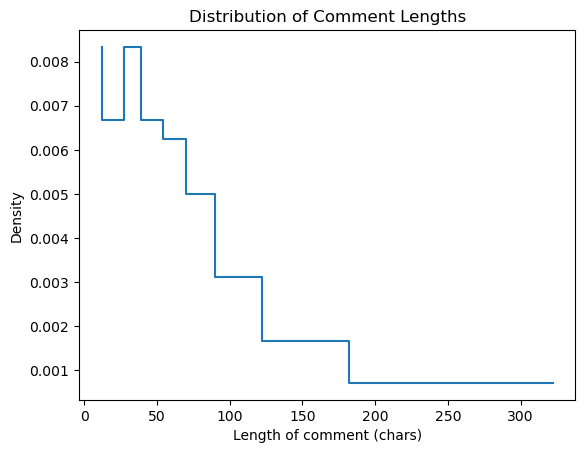

In [8]:
import matplotlib.pyplot as plt

percentile_list = percentiles.loc[0,].item()
density_list = []

for index, item in enumerate(percentile_list):
    lastval = 0
    if index > 0:
        lastval = percentile_list[index-1]
    density = 0.1 / (item-lastval)
    density_list.append(density)
    
plt.figure()

plt.step(percentile_list, density_list)
plt.xlabel("Length of comment (chars)")
plt.ylabel("Density")
plt.title("Distribution of Comment Lengths")
plt.savefig('allcoment_length_density.png')

In [16]:
working_comments2.count()

3881

In [9]:
# dummy variables for regex matches in the comments

snp =	"(?i)s and p|(?i)s&p|(?i)s&p 500|(?i)s&p500|(?i)s and p 500|(?i)spy|(?i)congress"
crypto =	"(?i)bitcoin|(?i)btc|(?i)eth|(?i)ether|(?i)crypto|(?i)etherium|(?i)alts|(?i)altcoin|(?i)shitcoin"
fed = "(?i)jp|(?i)powell|(?i)fed|(?i)federal reserve|(?i)jerome|(?i)jpow|(?i)printer"


working_comments2 = working_comments2.withColumn("snp", f.when(f.col("body").rlike(snp), 'true').otherwise('false')) \
            .withColumn("crypto", f.when(f.col("body").rlike(crypto), 'true').otherwise('false')) \
            .withColumn("fed", f.when(f.col("body").rlike(fed), 'true').otherwise('false')) 

In [10]:
working_comments2.groupBy('snp').count().show()
working_comments2.groupBy('crypto').count().show()
working_comments2.groupBy('fed').count().show()

# in 4k comments, 32 mention fed, 762 mention crypto, 31 mention the snp

+-----+-----+
|  snp|count|
+-----+-----+
|false| 3850|
| true|   31|
+-----+-----+

+------+-----+
|crypto|count|
+------+-----+
| false| 3119|
|  true|  762|
+------+-----+

+-----+-----+
|  fed|count|
+-----+-----+
|false| 3849|
| true|   32|
+-----+-----+



In [ ]:
# get most common words in the comments?
# use pipeline to tokenize strings
# make custom function to count occurences?

In [11]:
working_comments2 = working_comments2.withColumn("body", f.lower(f.col('body') ))

In [17]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer, CountVectorizer, IDF, StopWordsRemover, HashingTF
from pyspark.ml import Pipeline
from pyspark.sql.functions import col
import numpy as np



tokenizer = Tokenizer(inputCol="body", outputCol="words")
# Vectorize the words using CountVectorizer (instead of HashingTF)


stopwords_remover = StopWordsRemover(inputCol="words", outputCol="filtered_words")
#hashingTF = HashingTF(inputCol="filtered_words", outputCol="raw_features", numFeatures=20)

#countVectorizer = CountVectorizer(inputCol="filtered_words", outputCol="raw_features", vocabSize=1000, minDF=1)
# Compute the IDF (Inverse Document Frequency)
#idf = IDF(inputCol="raw_features", outputCol="tfidf_features")
# Build the pipeline
pipeline = Pipeline(stages=[tokenizer, stopwords_remover])





In [18]:
# Fit and transform the data
model = pipeline.fit(working_comments2)
result = model.transform(working_comments2)

In [14]:
documentAssembler = DocumentAssembler()\
    .setInputCol("body")\
    .setOutputCol("document")

MODEL_NAME='sentimentdl_use_twitter'

use = UniversalSentenceEncoder.pretrained(name="tfhub_use", lang="en")\
 .setInputCols(["document"])\
 .setOutputCol("sentence_embeddings")
# convert text to lowercase, remove special characters, punctuation, and transform words based on a provided dictionary.
sentimentdl = SentimentDLModel.pretrained(name=MODEL_NAME, lang="en")\
    .setInputCols(["sentence_embeddings"])\
    .setOutputCol("sentiments")

finisher= (
    Finisher()
    .setInputCols(["sentiments"]).setOutputCols("sentiment")
)

nlpPipeline = Pipeline(
      stages = [
          documentAssembler,
          use,
          sentimentdl,
          finisher
      ])

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[ | ]tfhub_use download started this may take some time.
Approximate size to download 923.7 MB


24/12/03 03:04:33 WARN S3AbortableInputStream: Not all bytes were read from the S3ObjectInputStream, aborting HTTP connection. This is likely an error and may result in sub-optimal behavior. Request only the bytes you need via a ranged GET or drain the input stream after use.
24/12/03 03:04:33 WARN S3AbortableInputStream: Not all bytes were read from the S3ObjectInputStream, aborting HTTP connection. This is likely an error and may result in sub-optimal behavior. Request only the bytes you need via a ranged GET or drain the input stream after use.


Download done! Loading the resource.
[ \ ]

2024-12-03 03:04:51.951305: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[ / ]

2024-12-03 03:04:57.267823: W external/org_tensorflow/tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 60236800 exceeds 10% of free system memory.
2024-12-03 03:04:57.359652: W external/org_tensorflow/tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 60236800 exceeds 10% of free system memory.
2024-12-03 03:04:57.413854: W external/org_tensorflow/tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 60236800 exceeds 10% of free system memory.
2024-12-03 03:04:57.498164: W external/org_tensorflow/tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 60236800 exceeds 10% of free system memory.
2024-12-03 03:04:57.548178: W external/org_tensorflow/tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 60236800 exceeds 10% of free system memory.


[ \ ]

[OK!]
sentimentdl_use_twitter download started this may take some time.
Approximate size to download 11.4 MB
[ | ]

24/12/03 03:05:05 WARN S3AbortableInputStream: Not all bytes were read from the S3ObjectInputStream, aborting HTTP connection. This is likely an error and may result in sub-optimal behavior. Request only the bytes you need via a ranged GET or drain the input stream after use.
24/12/03 03:05:05 WARN S3AbortableInputStream: Not all bytes were read from the S3ObjectInputStream, aborting HTTP connection. This is likely an error and may result in sub-optimal behavior. Request only the bytes you need via a ranged GET or drain the input stream after use.
24/12/03 03:05:05 WARN S3AbortableInputStream: Not all bytes were read from the S3ObjectInputStream, aborting HTTP connection. This is likely an error and may result in sub-optimal behavior. Request only the bytes you need via a ranged GET or drain the input stream after use.


sentimentdl_use_twitter download started this may take some time.
Approximate size to download 11.4 MB
Download done! Loading the resource.
[OK!]


In [19]:
pipelineModel = nlpPipeline.fit(working_comments2)
results2 = pipelineModel.transform(working_comments2)

In [20]:
results2.printSchema()

root
 |-- author: string (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- body: string (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- distinguished: string (nullable = true)
 |-- edited: double (nullable = true)
 |-- gilded: long (nullable = true)
 |-- id: string (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- retrieved_on: long (nullable = true)
 |-- score: long (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)
 |-- bodylen: integer (nullable = true)
 |-- snp: string (nullable = false)
 |-- crypto: string (nullable = false)
 |-- fed: string (nullable = false)
 |-- sentiment: array (nullable = true)
 |    |-- element: string (containsNull = true)



In [21]:
sentimentdata = results2.select(f.col('sentiment')).toPandas()

24/12/03 03:09:48 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [78]:
from pyspark import SparkContext
sc = SparkContext("local", "Simple App")
print(sc)


ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=Spark NLP, master=local[*]) created by getOrCreate at /opt/conda/lib/python3.11/site-packages/sparknlp/__init__.py:199 

In [81]:
#from pyspark.sql.functions import udf
#from pyspark.sql.types import FloatType

#@udf
#def get_score(sentimentrow, i):
#    return float(sentimentrow.item()[0].__getitem__('metadata')['positive']) - float(sentimentrow.item()[0].__getitem__('metadata')['negative']) 

#scoreUDF = udf(lambda x: get_score(x),FloatType() )


#results.withColumn('sentitems', f.col('sentiment') ).show(3)





# below 3was already commented out

#results.withColumn('sent_score',   f.col('sentiment').item()[0].__getitem__('metadata')['positive'].cast('float') - f.col('sentiment').item()[0].__getitem__('metadata')['negative'].cast('float') ).show(5)

#print(float(sentimentdata.loc[10].item()[0].__getitem__('metadata')['positive']) - float(sentimentdata.loc[10].item()[0].__getitem__('metadata')['negative']))


ParseException: 
[UNSUPPORTED_DATATYPE] Unsupported data type "LIST".(line 1, pos 0)

== SQL ==
list
^^^


In [90]:
!wget -N https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/lemma-corpus-small/lemmas_small.txt -P ./tmp --no-check-certificate
!wget -N https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sentiment-corpus/default-sentiment-dict.txt -P ./tmp --no-check-certificate

--2024-11-14 21:42:19--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/lemma-corpus-small/lemmas_small.txt
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.52.88, 54.231.135.24, 52.217.125.8, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.52.88|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 189437 (185K) [text/plain]
Saving to: ‘./tmp/lemmas_small.txt’

lemmas_small.txt    100%[===================>] 185.00K  --.-KB/s    in 0.007s  

2024-11-14 21:42:19 (25.5 MB/s) - ‘./tmp/lemmas_small.txt’ saved [189437/189437]

--2024-11-14 21:42:19--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sentiment-corpus/default-sentiment-dict.txt
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.200.40, 52.217.227.0, 52.217.142.152, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.200.40|:443... connected.
  Unable to locally verify the issuer'

In [50]:
# DONT RUN THIS ONE FOR REAL RESULTS/USES THE DICTIONARY BASED  DATA
# Import the required modules and classes
from sparknlp.base import DocumentAssembler, Pipeline, Finisher
from sparknlp.annotator import (
    SentenceDetector,
    Tokenizer,
    Lemmatizer,
    SentimentDetector
)
#import sparknlp.annotator.pragmatic
#from sparknlp.annotator.pragmatic import SentimentDetector


import pyspark.sql.functions as F
# Step 1: Transforms raw texts to `document` annotation
document_assembler = (
    DocumentAssembler()
    .setInputCol("body")
    .setOutputCol("document")
)
# Step 2: Sentence Detection
sentence_detector = SentenceDetector().setInputCols(["document"]).setOutputCol("sentence")
# Step 3: Tokenization
tokenizer = Tokenizer().setInputCols(["sentence"]).setOutputCol("token")
# Step 4: Lemmatization
lemmatizer= Lemmatizer().setInputCols("token").setOutputCol("lemma") \
                        .setDictionary("./tmp/lemmas_small.txt", key_delimiter="->", value_delimiter="\t")
# Step 5: Sentiment Detection
sentiment_detector= (
    SentimentDetector()
    .setInputCols(["lemma", "sentence"]) \
    .setOutputCol("sentiment_score") \
    .setDictionary("./tmp/default-sentiment-dict.txt", ",")
   
)

MODEL_NAME='sentimentdl_use_twitter'
sentimentdl = SentimentDLModel.pretrained(name=MODEL_NAME, lang="en")\
    .setInputCols(["lemma", "sentence"])\
    .setOutputCol("sentiment_score")


#sentiment_detector.enableScore = True


# Step 6: Finisher
finisher= (
    Finisher()
    .setInputCols(["sentiment_score"]).setOutputCols("sentiment")
)

# Define the pipeline
pipeline = Pipeline(
    stages=[
        document_assembler,
        sentence_detector, 
        tokenizer, 
        lemmatizer, 
        #sentiment_detector, 
        sentimentdl,
        finisher
    ]
)

sentimentdl_use_twitter download started this may take some time.
Approximate size to download 11.4 MB
[ | ]sentimentdl_use_twitter download started this may take some time.
Approximate size to download 11.4 MB


24/11/15 01:34:17 WARN S3AbortableInputStream: Not all bytes were read from the S3ObjectInputStream, aborting HTTP connection. This is likely an error and may result in sub-optimal behavior. Request only the bytes you need via a ranged GET or drain the input stream after use.
24/11/15 01:34:17 WARN S3AbortableInputStream: Not all bytes were read from the S3ObjectInputStream, aborting HTTP connection. This is likely an error and may result in sub-optimal behavior. Request only the bytes you need via a ranged GET or drain the input stream after use.


Download done! Loading the resource.
[ / ]

2024-11-15 01:34:20.792926: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[OK!]


TypeError: setInputCols in SentimentDLModel_eca587b575f7 expecting 1 columns. Provided column amount: 2. Which should be columns from the following annotators: ['sentence_embeddings']

In [11]:
pipelineModel = pipeline.fit(working_comments2)
results = pipelineModel.transform(working_comments2)



In [23]:
results2.show()

+--------------------+----------------------+--------------------+--------------------+----------------+-----------+-------------+------+------+-------+----------+----------+------------+-----+--------+--------------+------------+-------+-----+------+-----+----------+
|              author|author_flair_css_class|   author_flair_text|                body|controversiality|created_utc|distinguished|edited|gilded|     id|   link_id| parent_id|retrieved_on|score|stickied|     subreddit|subreddit_id|bodylen|  snp|crypto|  fed| sentiment|
+--------------------+----------------------+--------------------+--------------------+----------------+-----------+-------------+------+------+-------+----------+----------+------------+-----+--------+--------------+------------+-------+-----+------+-----+----------+
|discussionandrespect|                      |sleeping peaceful...|we’ll all be rich...|               0| 1689744941|         null|  null|     0|jsjytab|t3_153et67|t1_jsjy5nd|  1689744965|    1|

In [30]:
sentiment_chart_columns = ("sentiment","subreddit", "snp","crypto", "fed" ,"score","created_utc")
clean_results = results2.select(*sentiment_chart_columns)


In [31]:
clean_results = clean_results.withColumn("created_utc", f.from_unixtime("created_utc")) \
                .withColumn('day', f.dayofmonth('created_utc')) \
                .withColumn('month', f.month('created_utc')) \
                .withColumn('year', f.year('created_utc')) \
                .withColumn('pos', f.when(f.col('sentiment')[0] == 'positive', 1).otherwise(0)) \
                .withColumn('neg', f.when(f.col('sentiment')[0] == 'negative', 1).otherwise(0)) \
                .withColumn('neu', f.when(f.col('sentiment')[0] == 'neutral', 1).otherwise(0)) 


                    

In [32]:


clean_results.show()

+----------+--------------+-----+------+-----+-----+-------------------+---+-----+----+---+---+---+
| sentiment|     subreddit|  snp|crypto|  fed|score|        created_utc|day|month|year|pos|neg|neu|
+----------+--------------+-----+------+-----+-----+-------------------+---+-----+----+---+---+---+
|[positive]|CryptoCurrency|false| false|false|    1|2023-07-19 05:35:41| 19|    7|2023|  1|  0|  0|
| [neutral]|CryptoCurrency|false| false|false|    1|2023-07-19 06:17:27| 19|    7|2023|  0|  0|  1|
|[positive]|CryptoCurrency|false|  true|false|    1|2023-07-19 06:56:47| 19|    7|2023|  1|  0|  0|
|[positive]|CryptoCurrency|false| false|false|    1|2023-07-19 07:39:09| 19|    7|2023|  1|  0|  0|
|[negative]|CryptoCurrency|false| false|false|    1|2023-07-19 07:53:55| 19|    7|2023|  0|  1|  0|
|[positive]|CryptoCurrency|false|  true|false|    1|2023-07-19 08:12:27| 19|    7|2023|  1|  0|  0|
|[negative]|CryptoCurrency|false| false|false|    1|2023-07-19 08:29:21| 19|    7|2023|  0|  1|  0|


In [33]:
sentiment_over_time = clean_results.groupBy('year','month').agg(f.count('*').alias('total'),
                                          f.sum('pos').alias('postotal'),
                                         f.sum('neg').alias('negtotal'),
                                         f.sum('neu').alias('neutotal')).toPandas()




In [52]:
sentiment_over_time_daily = clean_results.withColumn('snp', f.col('snp').cast('boolean')). \
                            withColumn('fed', f.col('fed').cast('boolean')). \
                            withColumn('crypto', f.col('crypto').cast('boolean')). \
                            groupBy('year','month','day').agg(f.count('*').alias('total'),
                                          f.sum('pos').alias('postotal'),
                                         f.sum('neg').alias('negtotal'),
                                         f.sum('neu').alias('neutotal'),
                                        f.count(f.when(f.col('snp'), f.col('snp'))).alias('snpcomments'),
                                        f.count(f.when(f.col('fed'), f.col('fed'))).alias('fedcomments'),
                                        f.count(f.when(f.col('crypto'), f.col('crypto'))).alias('cryptocomments')
                                                             ).toPandas()

In [53]:
sentiment_over_time_daily.head()

,year,month,day,total,postotal,negtotal,neutotal,snpcomments,fedcomments,cryptocomments
0,2024,3,19,8,6,2,0,0,0,3
1,2023,9,4,24,11,11,2,1,1,6
2,2023,6,29,10,5,5,0,0,0,0
3,2023,8,10,21,14,7,0,0,0,1
4,2023,7,4,6,1,3,2,0,1,0


In [54]:
# checkpoint to save data for the ML section
sentiment_over_time_daily.to_csv('NLP_output_for_ml.csv')

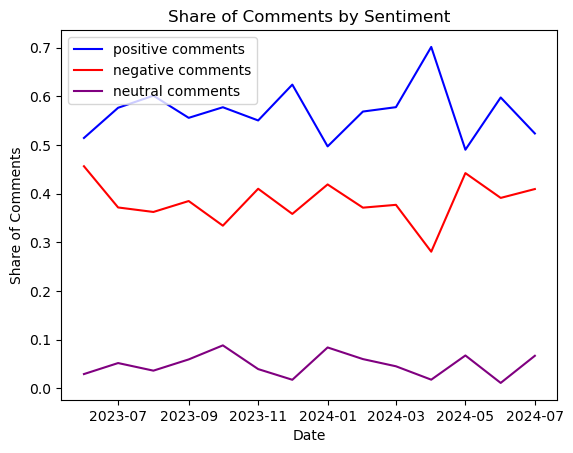

<Figure size 640x480 with 0 Axes>

In [138]:
import matplotlib.pyplot as plt
import datetime

sentiment_over_time['DATE'] = pd.to_datetime(sentiment_over_time[['year', 'month']].assign(DAY=1))

for row in range(0,sentiment_over_time.shape[0]):
    total = sentiment_over_time.loc[row,'total']
    sentiment_over_time.loc[row,'posshare'] = sentiment_over_time.loc[row,'postotal'] / total
    sentiment_over_time.loc[row,'negshare'] = sentiment_over_time.loc[row,'negtotal'] / total
    sentiment_over_time.loc[row,'neushare'] = sentiment_over_time.loc[row,'neutotal'] / total


sentiment_over_time.sort_values('DATE', inplace = True)
plt.figure()

#plt.plot(sentiment_over_time['DATE'], sentiment_over_time['total'], color = 'gray', label = 'all comments')
plt.plot(sentiment_over_time['DATE'], sentiment_over_time['posshare'], color = 'b', label = 'positive comments')
plt.plot(sentiment_over_time['DATE'], sentiment_over_time['negshare'], color = 'r', label = 'negative comments')
plt.plot(sentiment_over_time['DATE'], sentiment_over_time['neushare'], color = 'purple', label = 'neutral comments')

plt.title('Share of Comments by Sentiment')
plt.xlabel('Date')
plt.ylabel('Share of Comments')

plt.legend()
plt.show()

plt.savefig('sentiment_share_of_comments.png')

In [102]:

# group by number of comments with each sentiment for each mention
sentiment_mentions = clean_results.groupBy('snp','crypto','fed').agg(f.count('*').alias('total'),
                                          f.sum('pos').alias('postotal'),
                                         f.sum('neg').alias('negtotal'),
                                         f.sum('neu').alias('neutotal')).toPandas()



In [103]:
# create a table 
import dataframe_image as dfi

# adjust numbers to be percent of total
for row in range(0,sentiment_mentions.shape[0]):
    total = sentiment_mentions.loc[row,'total']
    sentiment_mentions.loc[row,'postotal'] = sentiment_mentions.loc[row,'postotal'] / total
    sentiment_mentions.loc[row,'negtotal'] = sentiment_mentions.loc[row,'negtotal'] / total
    sentiment_mentions.loc[row,'neutotal'] = sentiment_mentions.loc[row,'neutotal'] / total
    
sentiment_mentions['total'] = sentiment_mentions['total'] / sum(sentiment_mentions['total'])
#sentiment_mentions = sentiment_mentions.round(2)
#pd.options.display.float_format = "{:,.2f}".format
sentiment_mentions.columns = ['S&P Mentioned', 'Crypto Mentioned', 'Fed Mentioned', 'Share of All Comments', '% Positive', '% Negative', '% Neutral']
df_styled = sentiment_mentions.style.background_gradient()

/tmp/ipykernel_135/3390288318.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6917900403768507' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sentiment_mentions.loc[row,'postotal'] = sentiment_mentions.loc[row,'postotal'] / total
/tmp/ipykernel_135/3390288318.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.27456258411843876' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sentiment_mentions.loc[row,'negtotal'] = sentiment_mentions.loc[row,'negtotal'] / total
/tmp/ipykernel_135/3390288318.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.033647375504710635' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
 

In [104]:
df_styled

,S&P Mentioned,Crypto Mentioned,Fed Mentioned,Share of All Comments,% Positive,% Negative,% Neutral
0,true,true,true,0.000258,1.000000,0.000000,0.000000
1,false,true,false,0.191446,0.691790,0.274563,0.033647
2,false,false,false,0.792837,0.538837,0.407215,0.053949
3,true,true,false,0.001804,0.714286,0.285714,0.000000
4,true,false,false,0.005669,0.818182,0.181818,0.000000
5,true,false,true,0.000258,1.000000,0.000000,0.000000
6,false,true,true,0.002834,0.545455,0.454545,0.000000
7,false,false,true,0.004896,0.421053,0.421053,0.157895


In [ ]:
# plots
# plot 1: average sentiment across a
ll comments over time(lines)



# plot 2: share of pos/neg/neurtral sentiment (stacked bars)




# plot 3: daily mentions of fed vs. daily sentiment? (scatter)